<a href="https://colab.research.google.com/github/arkajyotiMukherjee/EEG-research/blob/master/EEG_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/EEG Research/EEG'

In [0]:
!pip install -U mne

     |████████████████████████████████| 6.4MB 3.3MB/s 


In [0]:
import mne

/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [0]:
mne.set_log_level('WARNING')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

#hide warnings
import warnings

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [0]:
# from mne.datasets import spm_faces
raw_frame = root_path + '/faces_run1.bdf'
print(raw_frame)

gdrive/My Drive/EEG Research/EEG/faces_run1.bdf


In [0]:
raw = mne.io.read_raw_bdf(raw_frame, montage=None, eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)
print(raw)

<RawEDF  |  faces_run1.bdf, n_channels x n_times : 144 x 1341440 (655.0 sec), ~1.44 GB, data loaded>


In [0]:
# import numpy as np
# data, times = raw.get_data(return_times= True)
# print("Data:\n", data)
# print("Times:\n", times)
# np.savetxt('data.txt', data, delimiter=' ')

Data:
 [[1.16054942e-02 1.16068379e-02 1.16075567e-02 ... 8.37921889e-03
  8.38075014e-03 8.38096889e-03]
 [1.17941188e-02 1.17983688e-02 1.17981188e-02 ... 8.87609297e-03
  8.87934297e-03 8.87881172e-03]
 [1.00840907e-02 1.00864032e-02 1.00863407e-02 ... 6.12078556e-03
  6.12284806e-03 6.12447306e-03]
 ...
 [2.44140639e-07 2.44140639e-07 2.44140639e-07 ... 2.44140639e-07
  2.44140639e-07 2.44140639e-07]
 [7.65339551e+00 7.65339551e+00 7.65339551e+00 ... 7.65339551e+00
  7.65339551e+00 7.65339551e+00]
 [1.30560000e+05 1.30560000e+05 1.30560000e+05 ... 6.50240000e+04
  6.50240000e+04 6.50240000e+04]]
Times:
 [0.00000000e+00 4.88281250e-04 9.76562500e-04 ... 6.54998535e+02
 6.54999023e+02 6.54999512e+02]


In [0]:
# print(data.shape)
# print(times.shape)
# data_30k = data[:,1:30000]
# np.savetxt('data_30K.txt', data_30k, delimiter=' ')

(144, 1341440)
(1341440,)


# Add Headspace location

In [0]:
montage = mne.channels.read_montage(kind='electrode_locations_and_headshape', path=root_path, unit='auto')

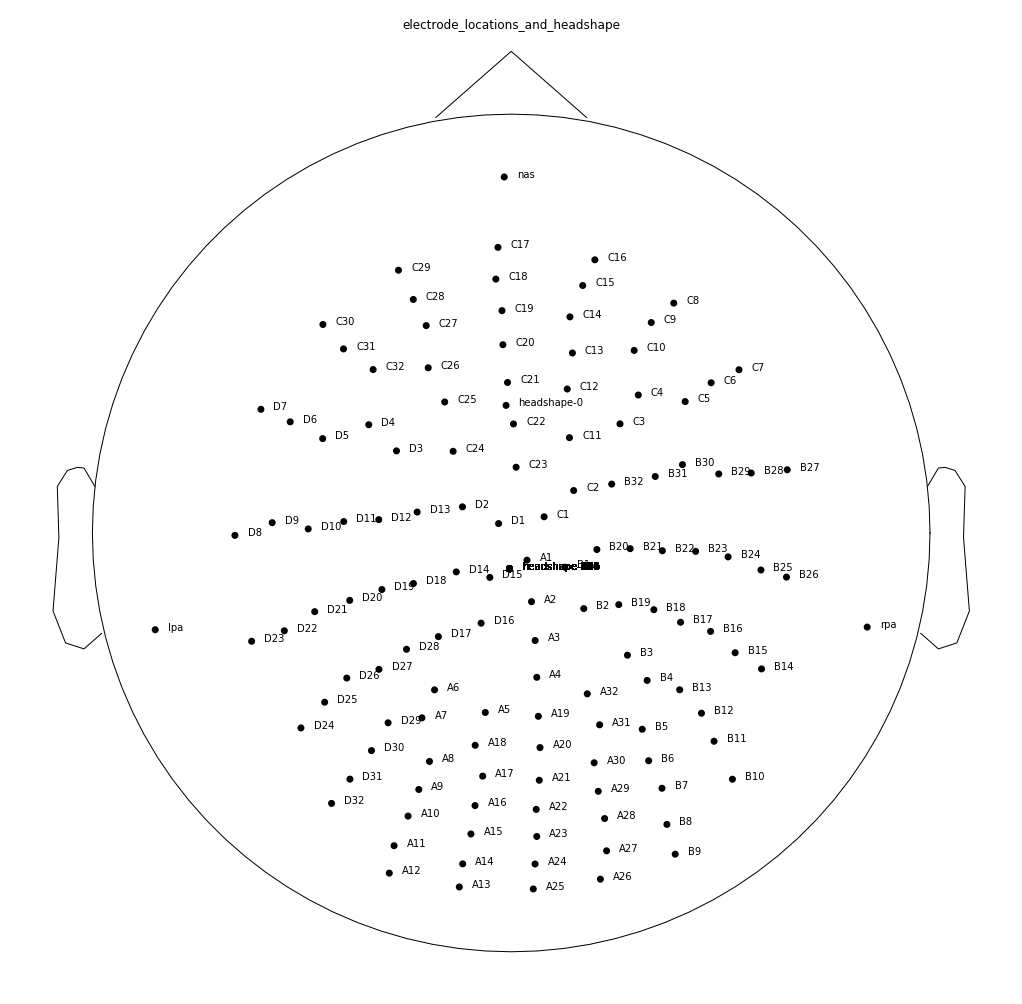

In [0]:
plt.rcParams['figure.figsize'] = (14,14)
montage.plot();

In [0]:
raw.set_montage(montage=montage, set_dig=True)

<RawEDF  |  faces_run1.bdf, n_channels x n_times : 144 x 1341440 (655.0 sec), ~1.44 GB, data loaded>

# Filtering

Applying a bandpass filter 1Hz to 40Hz

In [0]:
raw.filter(1., 40., fir_design='firwin')

<RawEDF  |  faces_run1.bdf, n_channels x n_times : 144 x 1341440 (655.0 sec), ~1.44 GB, data loaded>

In [0]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | A1, A2, A3, A4, A5, A6, A7, A8, A9, ...
    chs : list | 144 items (EEG: 143, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 128 items (128 EEG)
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2004-07-13 17:18:26 GMT
    nchan : int | 144
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 2048.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType

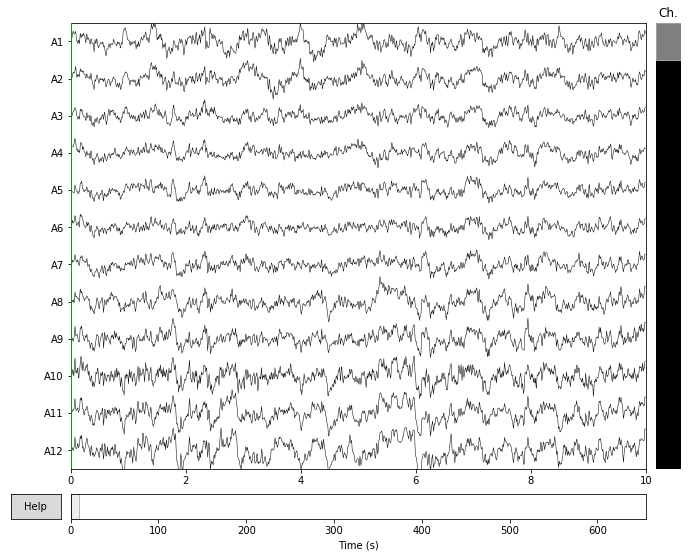

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

fig = raw.plot(n_channels=12)

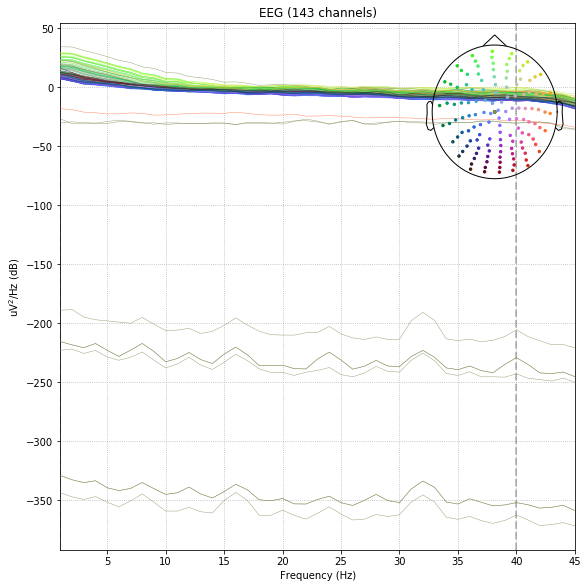

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)

raw.plot_psd(fmin=1., fmax=45., tmax=60., average=False);

In [0]:
events = mne.find_events(raw, stim_channel='Status', verbose=True)

print(events[:5]) # 2d numpy array

Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
172 events found
Event IDs: [65152]
[[15790 65024 65152]
 [23336 65024 65152]
 [30814 65024 65152]
 [38291 65024 65152]
 [45837 65024 65152]]


In [0]:
f = open(root_path + '/condition_labels.txt', 'r')
labels = f.read().split('\n')
f.close()

In [0]:
# print(labels)
# Utkarsh ka likha hua
for i in range(172):
    if labels[i]=='scrambled':
        events[i][2]=2
    else:
        events[i][2]=1

In [0]:
print(events[:5])

[[15790 65024     2]
 [23336 65024     1]
 [30814 65024     1]
 [38291 65024     2]
 [45837 65024     1]]


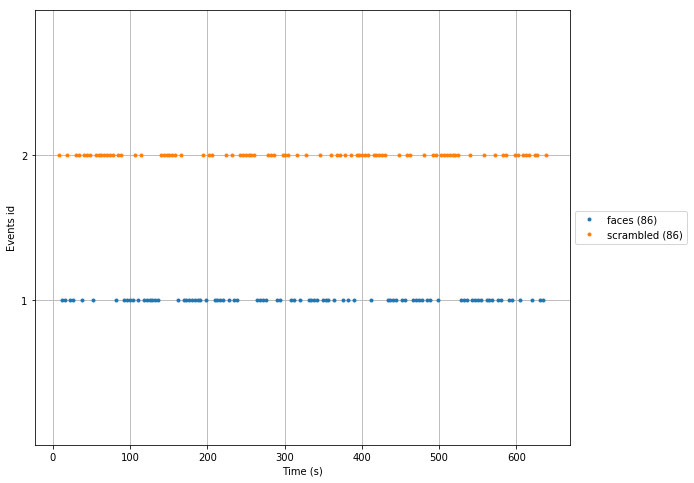

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

event_id = {"faces": 1, "scrambled": 2}
mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, event_id=event_id);

# Raw to epoch

In [0]:
event_id = {"faces": 1, "scrambled": 2}
tmin, tmax = -0.1, 0.5

exclude_list = ['bads', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']

picks = mne.pick_types(raw.info, eeg=True, stim=True, eog=True, exclude=exclude_list)
print(picks)

# read epochs
decim = 2
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                   picks=picks, baseline=None, preload=True,
                   reject=dict(eeg=46e-5), decim=decim)
print(epochs)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 143]
<Epochs  |   172 events (all good), -0.0996094 - 0.5 sec, baseline off, ~104.4 MB, data loaded,
 'faces': 86
 'scrambled': 86>


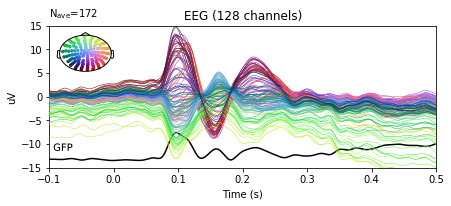

In [0]:
%matplotlib inline

evoked = epochs.average()
evoked.plot(spatial_colors=True, gfp=True, picks='eeg', ylim=dict(eeg=[-15, 15]));

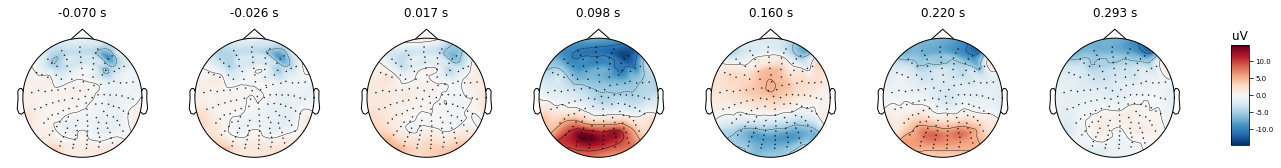

In [0]:
import numpy as np

evoked.plot_topomap(times='peaks', size=1.6);

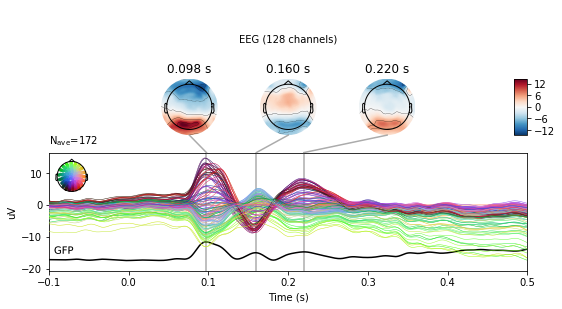

In [0]:
ts_args = dict(gfp=True)
topomap_args = dict(sensors=False)
evoked.plot_joint(times='peaks', ts_args=ts_args, topomap_args=topomap_args);

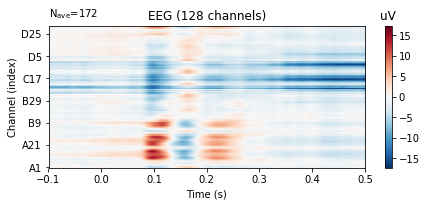

In [0]:
evoked.plot_image(picks='eeg');

In [0]:
from mne.preprocessing import ICA
ica = ICA(n_components=0.95, random_state=0, method='infomax', fit_params=dict(extended=True)).fit(epochs, decim=3)

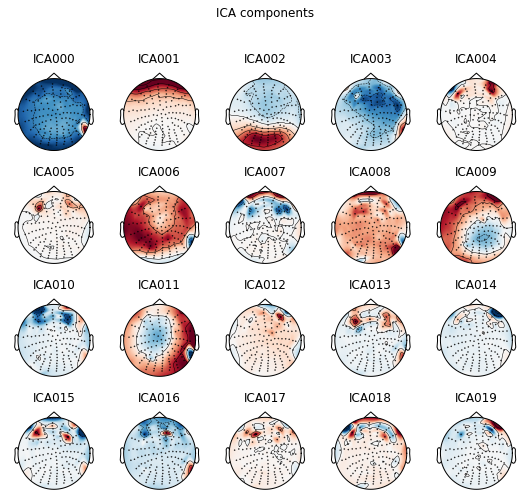

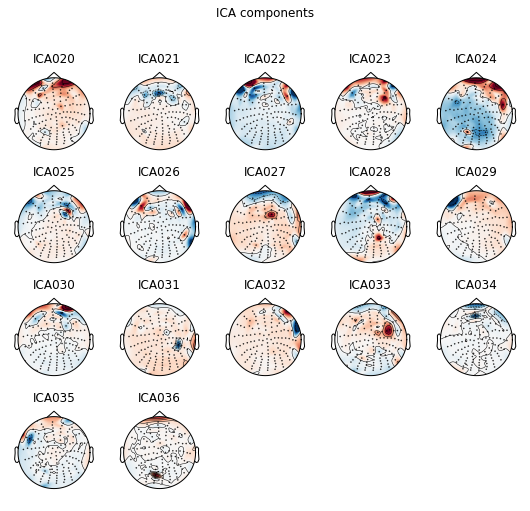

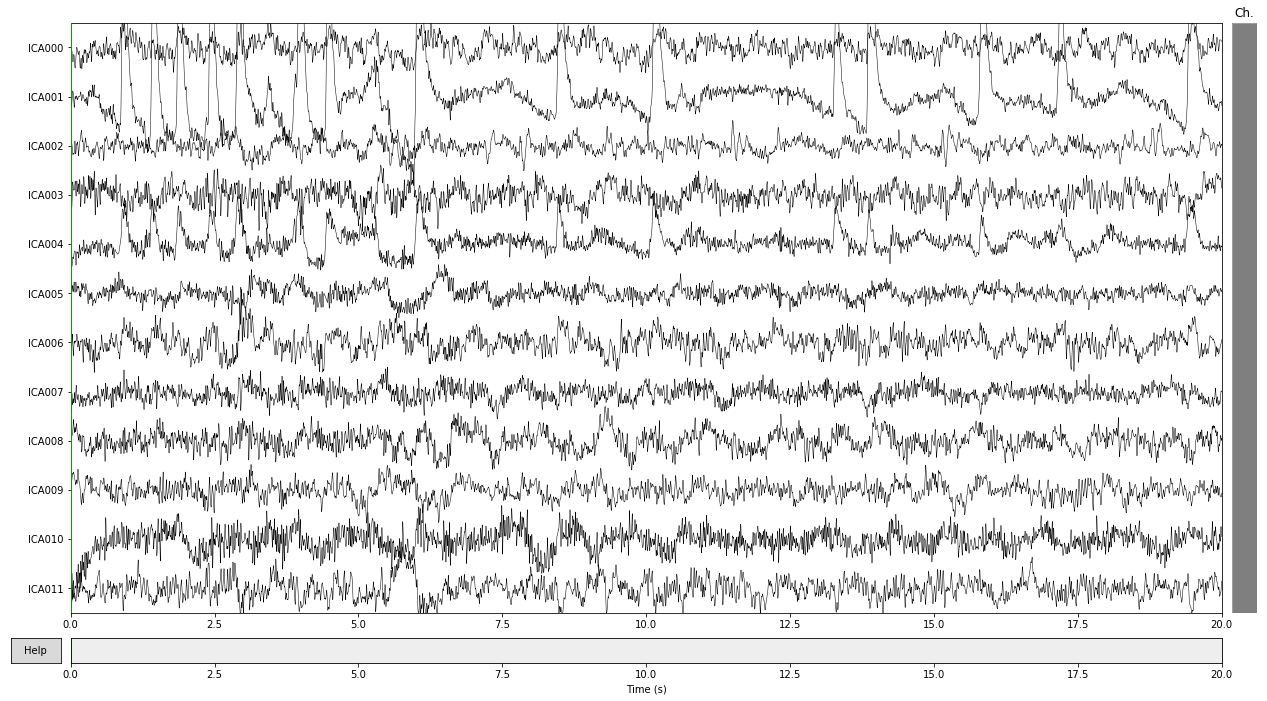

In [0]:
# ica.plot_components(picks=range(5));
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)

ica.plot_components();
ica.plot_sources(raw.copy().crop(0, 20), picks=range(12));

## The region of the brain most active when showing faces

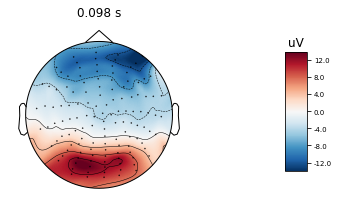

In [0]:
evoked_faces = epochs['faces'].average()
evoked_faces.plot_topomap(times=[0.098], size=2);

## Visualizing the activation using the anatomy of the subjects

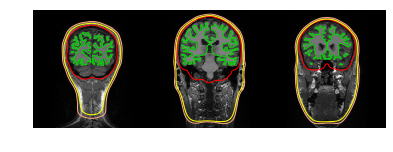

In [0]:
subjects_dir = root_path + '/subjects'

mne.viz.plot_bem(subject='spm', subjects_dir=subjects_dir, slices=[50,100,150], brain_surfaces='white');

# Classification

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from mne.decoding import SlidingEstimator, cross_val_multiscore

In [0]:
picks = mne.pick_types(epochs.info, eeg=True, stim=False)
X = epochs.get_data()[:, picks]  # MEG signals: n_epochs, n_channels, n_times
y = epochs.events[:, 2]  # target: Face or Scrambled face

clf = make_pipeline(StandardScaler(), LogisticRegression())

X_2d = X.reshape(len(X), -1)
scores = cross_val_score(clf, X_2d, y, cv=5, n_jobs=1, scoring='accuracy')

# Mean scores across cross-validation splits
print("Cross-validation (Accuracy) score : %s" % np.mean(scores))

Cross-validation (Accuracy) score : 0.8833333333333332


In [0]:
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')
scores = cross_val_multiscore(time_decod, X, y, cv=5, n_jobs=1)

# Mean score across cross-validation splits for each time instant
scores = np.mean(scores, axis=0)
print(scores.shape)
print(X.shape)

(615,)
(172, 128, 615)


Plot Cross Validation over time

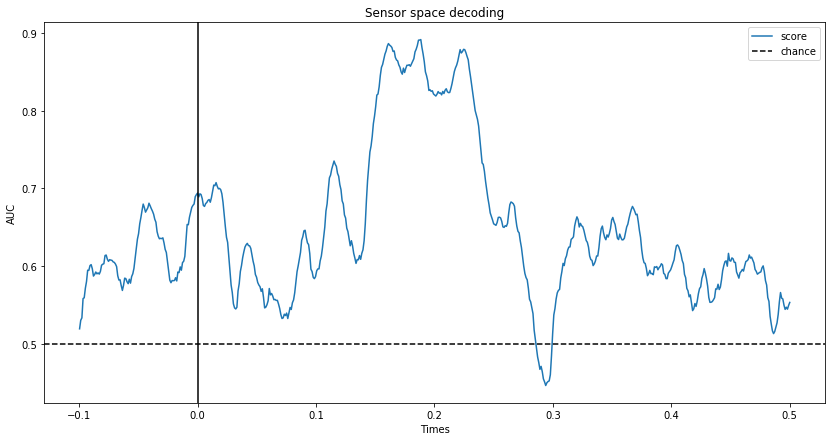

In [0]:
plt.rcParams['figure.figsize'] = (14,7)

fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC') # Area under the curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
plt.show()